# DATA UNDERSTANDING #

1. **Building the Dataset**

_1.1 Participants:_
- A lively and amicable 3.5-month-old male Scottish Fold kitten named Mio served as the primary subject.
- A diverse group of human participants, including myself as a researcher and a person representing adult male vocalizations, my daughter for children's vocalizations, and my sister representing adult female vocalizations.

_1.2 Experimental Contexts:_  
Accompanied by the study author, the kitten was exposed to four distinct contexts aimed at eliciting varied meows:

- Waiting for Food (Condition `F`):
The author initiated routine morning recordings preceding mealtime, with food delivered after the recordings done.

- Seeking Attention in Isolation (Condition `A`):
The kitten was placed in an isolated room with ample provisions and signaled its need for attention by meowing at the closed door.

- Contentment (Condition `C`):
The kitten is purring while petted and caressed by author in a home environment for 3-5 minutes.

- Thrill (Condition `T`):
Meowing during a state of contentment.

Typically, vocalizations in a single exposure comprised multiple repeated meows.
This section describes the data acquisition protocol and the obtained dataset. 

2. **Data Acquisition Process**

The experiment spanned 10-15 days, conducted in the same room, with daily data collection using a Samsung Note20 phone equipped with the "Samsung Voice Recorder" app.  
Each recorded audio file, averaging 1.5-2.5 minutes, was converted to .wav format via www.veed.io  
Further processing included breaking down each .wav file into individual meows (less than 3 seconds) and purrs (less than 5 seconds).

3. **Dataset Composition:**
The dataset consists of:

- 100 meows obtained under Condition `F`
- 100 meows obtained under Condition `A`
- 100 meows obtained under Condition `C`
- 100 meows obtained under Condition `T`

Additionally, we included 100 meows combined from a kid, adult male, and adult female to aid the program in recognizing human voices.  
This diverse set of vocalizations allows us predict human's meows if users want to simulate meowing themselves.


# BUSINESS PROBLEM #

Many people decide to get a kitten, but they don't always fully understand what these cute creatures need.  
Games, food or something else?  
And how to find out if they enjoy playing?

Our project consists of two key parts:

- **Model for predicting meowing categories:**  
We aim to create a model that accurately determines which category a meow belongs to with the best F1 score.  
Data processing speed is also an important aspect, influencing the second part of our work.

- **Mobile app for owner training:**  
Based on the model's results, we are developing a mobile app.  
It provides new owners with the opportunity to learn how to understand their furry friends from the very first days in their new home.


**Importing necessary libraries**

In [3]:
import os
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import models
import IPython.display as ipd

import pandas as pd
import librosa
import librosa.display
plt.rcParams['pcolor.shading'] = 'nearest'

# Exploratory Data Analysis #

In [48]:
audio_data = 'data/202312132017_KAT_K_41.WAV'
x, sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(7763,) 22050


In [49]:
librosa.load(audio_data, sr=44100)
ipd.Audio(audio_data)

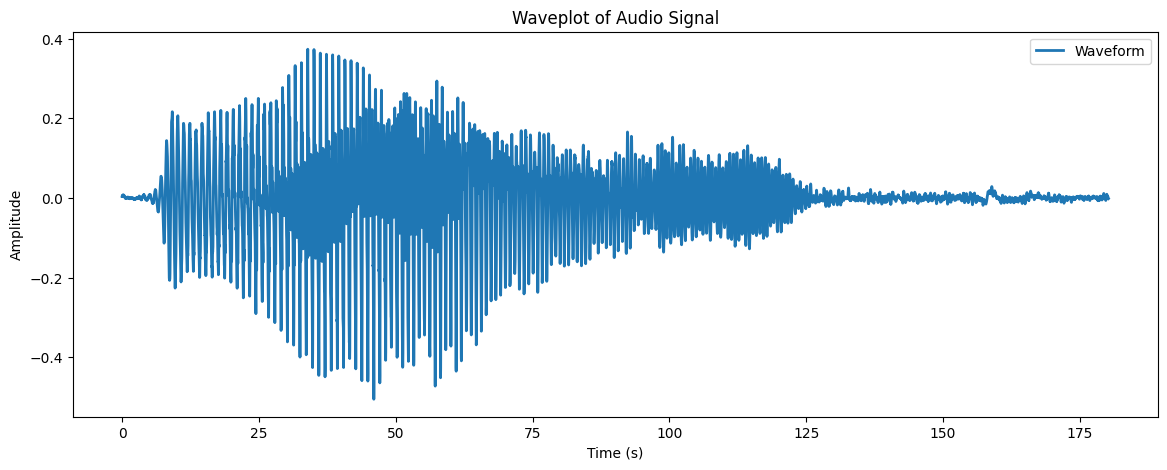

In [50]:
plt.figure(figsize=(14, 5))
plt.plot(librosa.times_like(x), x, label='Waveform', linewidth=2)
plt.title('Waveplot of Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

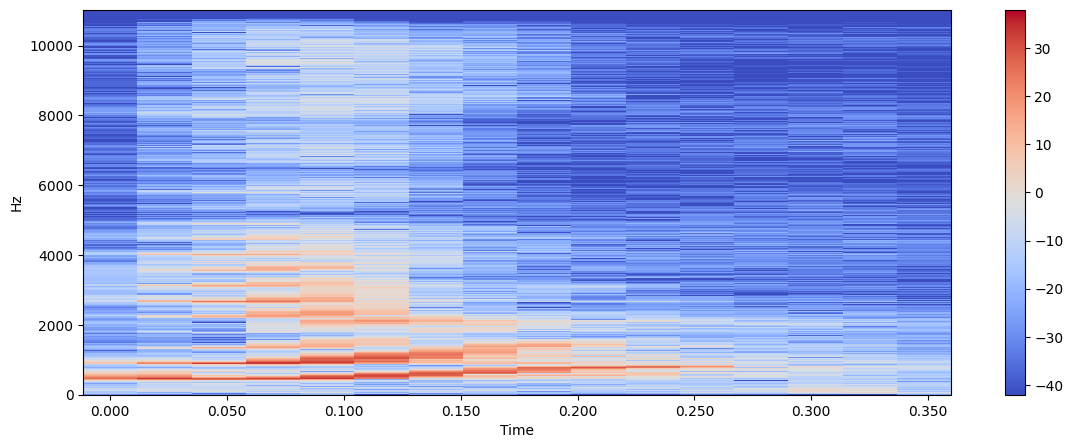

In [51]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb,sr=sr, x_axis='time', y_axis='hz')
plt.colorbar();

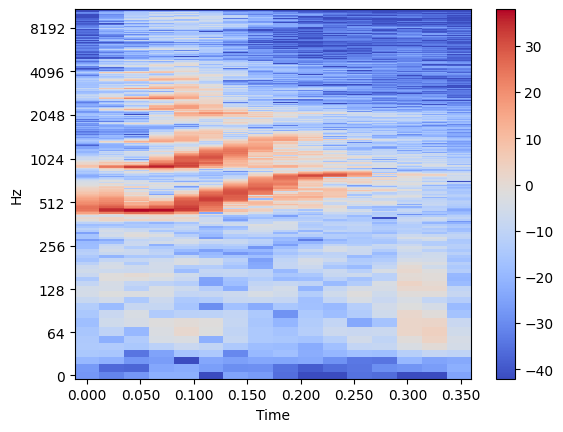

In [52]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

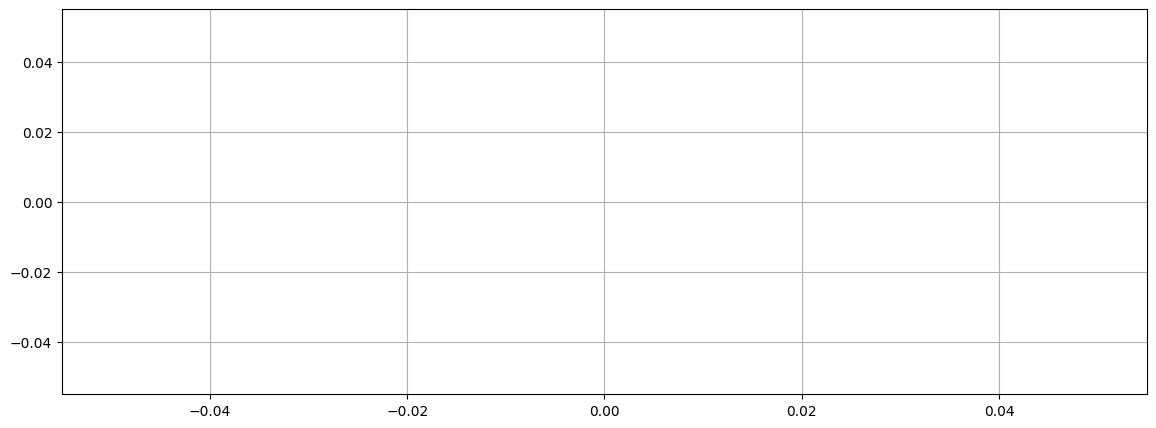

In [53]:
# plt.figure(figsize=(14, 5))
# plt.plot(librosa.times_like(x), x, label='Waveform', linewidth=2)
# plt.title('Waveplot of Audio Signal')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.show()
# Zooming in
n0 = 21000
n1 = 21500
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [54]:
# zero_crossings = librosa.zero_crossings(x[n0:n1])
# print('Zero-Crossing value is:', sum(zero_crossings))

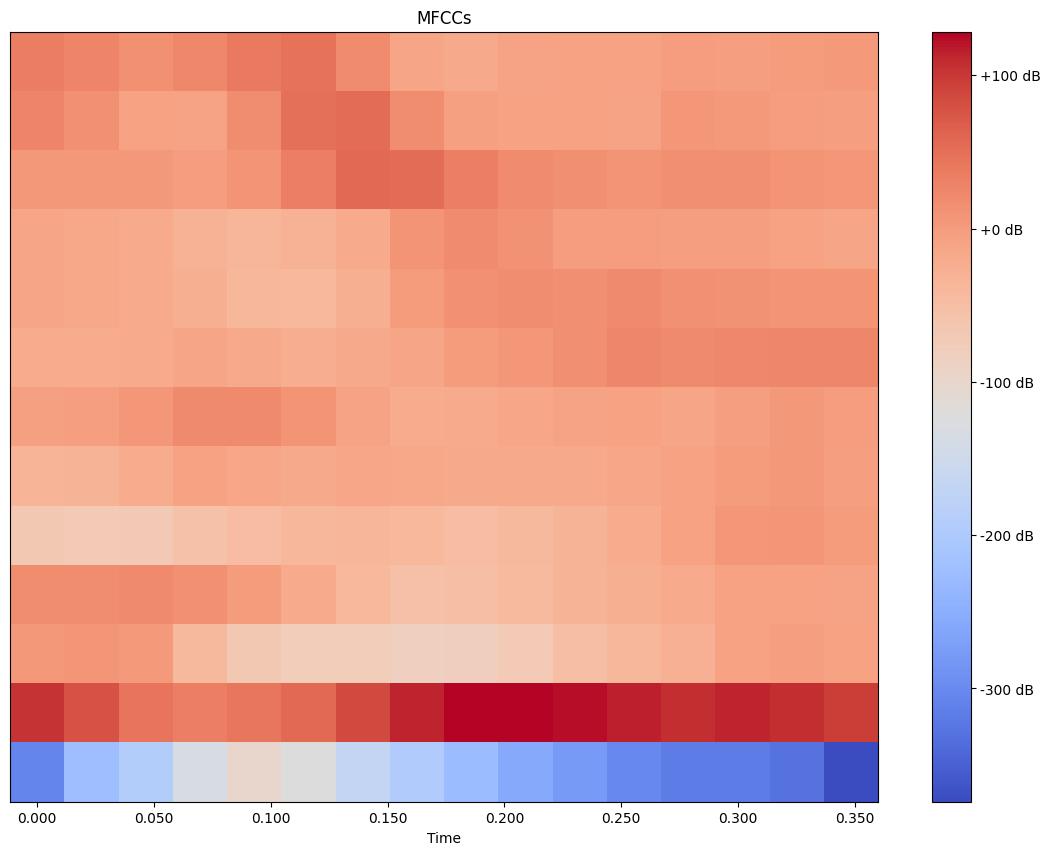

In [55]:

# Compute the mel spectrogram
S = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128, fmax=8000)

# Convert the mel spectrogram to MFCCs
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=13)

# Plot the MFCCs
plt.figure(figsize=(14, 10))
plt.title('MFCCs')
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()

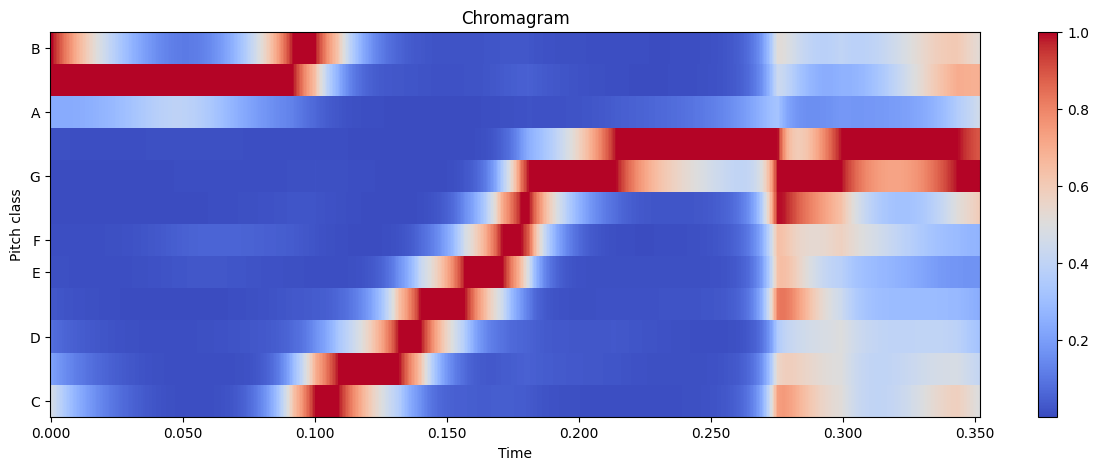

In [56]:
# Set the hop length
hop_length = 12

# Compute the chromagram
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)

# Plot the chromagram
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.title('Chromagram')
plt.colorbar()
plt.show()


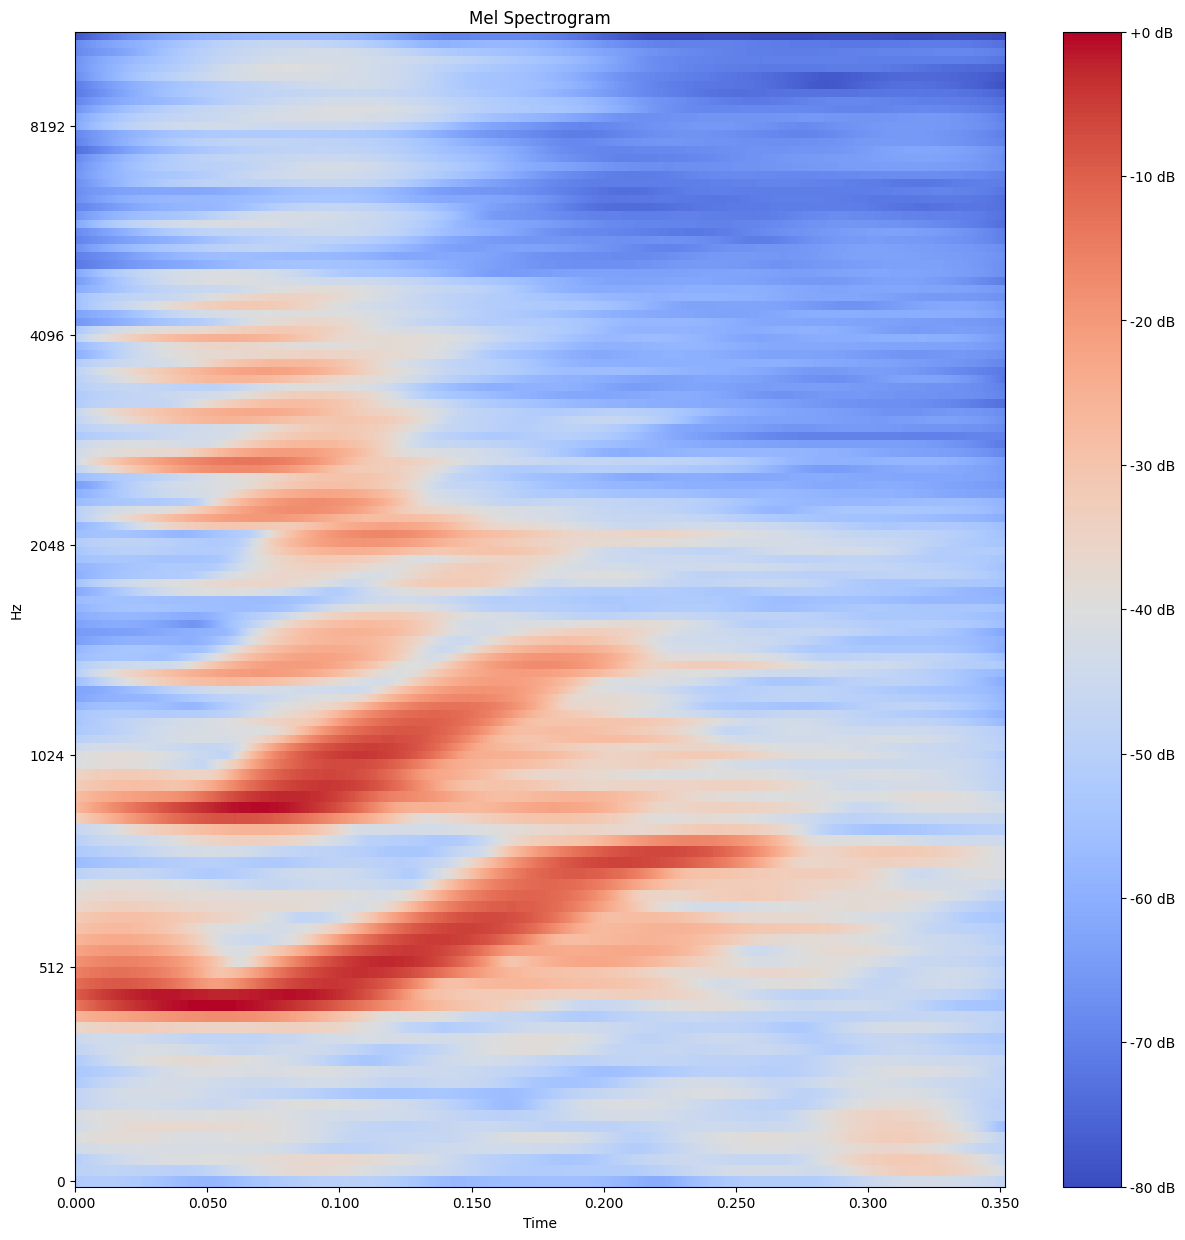

In [57]:
# Set the hop length
hop_length = 12

# Compute the mel spectrogram
mel_spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, hop_length=hop_length)

# Plot the mel spectrogram
plt.figure(figsize=(15, 15))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), x_axis='time', y_axis='mel', hop_length=hop_length, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


c:\Users\HUANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=971
  warnings.warn(
c:\Users\HUANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=486
  warnings.warn(
c:\Users\HUANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=243
  warnings.warn(
c:\Users\HUANDE\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=122
  warnings.warn(


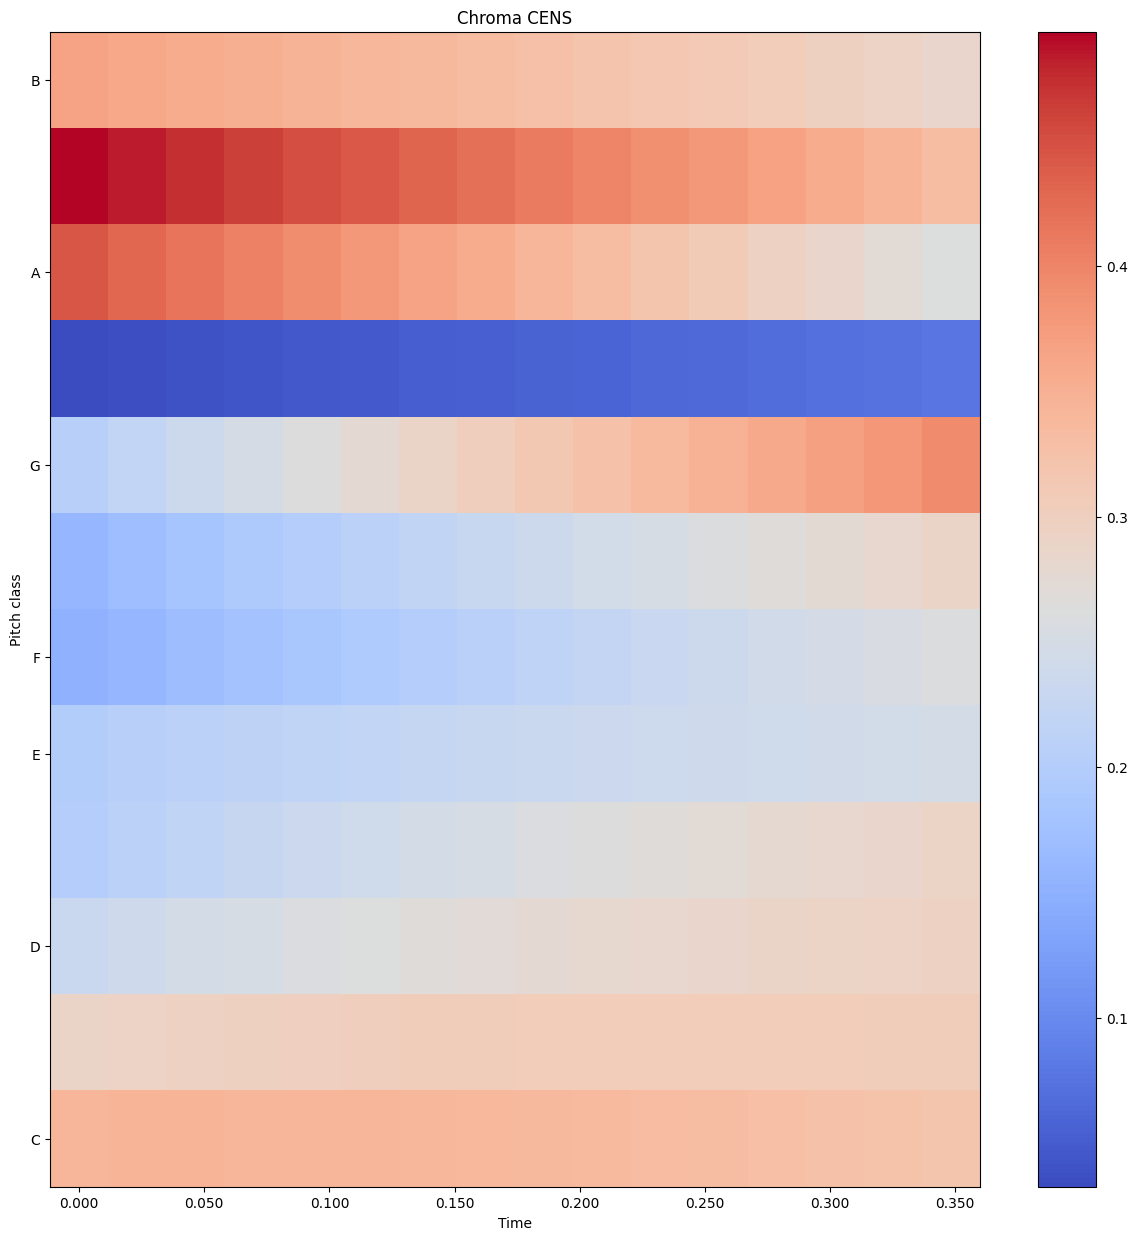

In [58]:
# Compute the chromagram
chromagram = librosa.feature.chroma_cens(y=x)

# Plot the chromagram
plt.figure(figsize=(15, 15))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma CENS')
plt.show()